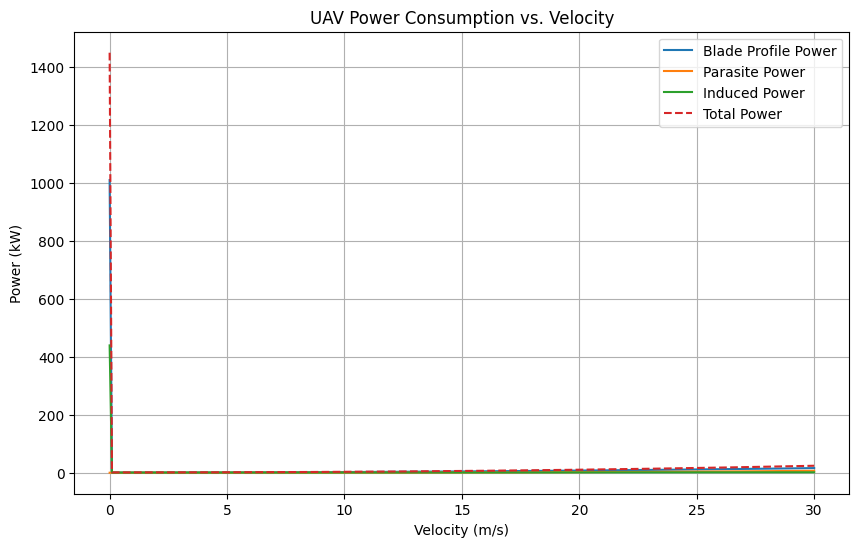

In [1]:
import math
import matplotlib.pyplot as plt

# Parameter values from the paper
K = 570
r = 1.225
F = 0.4
m = 5
g = 9.81
A = 0.25

# UAV velocity values (0 to 30 m/s with 0.1 m/s intervals)
v_values = [v / 10 for v in range(0, 301)]

# Lists to store power consumption values
P_blade = []
P_parasite = []
P_induced = []
P_total = []

# Calculate power consumption for each velocity value
for v in v_values:
    # Calculate induced velocity (vi) using Equation (12)
    if v == 0:
        vi = math.sqrt((m*g)/(2*r*A))  # Special case for hovering (v=0)
    else:
        vi = math.sqrt((v**2 + math.sqrt(v**4 + (m*g/(r*A))**2))/2)

    # Calculate power components
    if v == 0:
        P_blade.append(K + ((m*g)**(3/2))/(math.sqrt(2*r*A)))  # Equation (14) for hovering
        P_parasite.append(0)  # No parasite power when hovering
        P_induced.append(m * g * vi)
    else:
        P_blade.append((K + 3 * K * (v**2) / (10**2)) / 1000)  # Equation (9) for non-hovering (use 10 as vb)
        P_parasite.append((0.5 * r * v**3 * F) / 1000)  # Equation (10)
        P_induced.append((m * g * vi) / 1000)  # Equation (11)

    # Calculate total power using Equation (13)
    P_total.append(P_blade[-1] + P_parasite[-1] + P_induced[-1])
